continue 21.48935 -1.64673
continue 21.50935 -1.64714
continue 21.52935 -1.64757
continue 21.54935 -1.64802
continue 21.56935 -1.64849
continue 21.58935 -1.64898
continue 21.60935 -1.64949
continue 21.62935 -1.65003
continue 21.64935 -1.65060
continue 21.66935 -1.65119
continue 21.68935 -1.65181
continue 21.70935 -1.65246
continue 21.72935 -1.65314
continue 21.74935 -1.65385
continue 21.76935 -1.65460
continue 21.78935 -1.65538
continue 21.80935 -1.65619
continue 21.82935 -1.65705
continue 21.84935 -1.65794
continue 21.86935 -1.65888
continue 21.88935 -1.65986
continue 21.90935 -1.66089
continue 21.92935 -1.66197
continue 21.94935 -1.66309
continue 21.96935 -1.66428
continue 21.98935 -1.66551
continue 22.00935 -1.66681
continue 22.02935 -1.66816
continue 22.04935 -1.66958
continue 22.06935 -1.67107
continue 22.08935 -1.67262
continue 22.10935 -1.67425
continue 22.12935 -1.67596
continue 22.14935 -1.67775
continue 22.16935 -1.67962
continue 22.18935 -1.68158
continue 22.20935 -1.68363
c

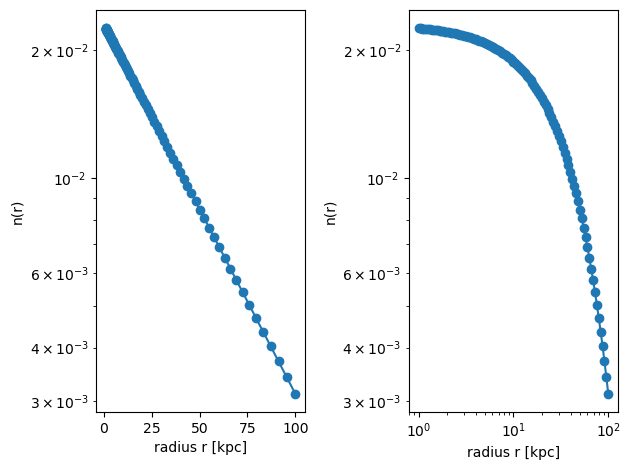

In [2]:
# Generate exponential density profile for Cloudy
import numpy as np
import matplotlib.pyplot as plt

from astropy import constants as const
from astropy.io import ascii
# from scipy.integrate import trapz
from numpy import log10, exp

kpc = const.kpc.cgs.value

#--------------------------------------------------
# Input parameters
r_in  = 1.0         # [kpc]
r_out = 100.        # [kpc]
r_e   = 0.5 * r_out
NHI_total = 3e21    # [cm^-2]
file_dlaw_41 = r'/home/jin/CIV_Photoionization/Lumin_41/dlaw_HI_exp.ini'
file_dlaw_42 = r'/home/jin/CIV_Photoionization/Lumin_42/dlaw_HI_exp.ini'
#--------------------------------------------------

n0 = 1.0
rr = np.logspace(log10(r_in), log10(r_out), 101)

nn_exp = n0 * exp(-rr / r_e)

# Scale to match the total H column density
# Analytic solution
n0_analytic = NHI_total / (exp(-r_in / r_e) - exp(-r_out / r_e)) / (r_e * kpc)

# Numerical integration for arbitrary functional form using trapz
NHI_integ = np.trapz(nn_exp, rr) * kpc
n0 = NHI_total / NHI_integ
nn_exp = n0 * exp(-rr / r_e)

# Plot with linear-log space
plt.subplot(1, 2, 1)
plt.plot(rr, nn_exp, 'o-')
plt.xlabel(r'radius r [kpc]')
plt.ylabel(r'n(r)')
plt.yscale('log')

# Plot with linear-log space
plt.subplot(1, 2, 2)
plt.plot(rr, nn_exp, 'o-')
plt.xlabel(r'radius r [kpc]')
plt.ylabel(r'n(r)')
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
# Pad one more pixel outside the r_out to include full range 
# that is specified in "radius [r_in, r_out]"
# Purely numerical reason.
rr_pad = r_out * (rr[1] / rr[0])
nn_pad = n0 * exp(-rr_pad / r_e)

# Output
for ii in range(len(rr)):
    print("continue {:8.5f} {:8.5f}".format(log10(rr[ii] * kpc), log10(nn_exp[ii])))

with open(file_dlaw_41, 'w') as fp:
    print("dlaw table", file=fp)
    for r_i, n_i in zip(rr, nn_exp):
        print("continue {:8.5f} {:8.5f}".format(log10(r_i * kpc), log10(n_i)), file=fp)
    print("continue {:8.5f} {:8.5f}".format(log10(rr_pad * kpc), log10(nn_pad)), file=fp)
    print("end of dlaw", file=fp)


for ii in range(len(rr)):
    print("continue {:8.5f} {:8.5f}".format(log10(rr[ii] * kpc), log10(nn_exp[ii])))

with open(file_dlaw_42, 'w') as fp:
    print("dlaw table", file=fp)
    for r_i, n_i in zip(rr, nn_exp):
        print("continue {:8.5f} {:8.5f}".format(log10(r_i * kpc), log10(n_i)), file=fp)
    print("continue {:8.5f} {:8.5f}".format(log10(rr_pad * kpc), log10(nn_pad)), file=fp)
    print("end of dlaw", file=fp)

# C IV Density

/tmp/ipykernel_19398/3028245407.py:30: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  CIV_integ = np.trapz(nn_exp, rr) * kpc
/tmp/ipykernel_19398/3028245407.py:56: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Column_CIV = np.trapz(nn_exp,rr_CIV)*kpc


Column Density (CIV) = 9.59 × 10^15 cm^-2


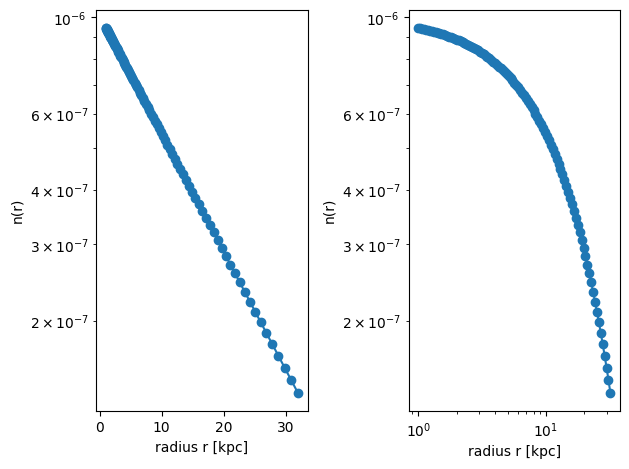

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# from astropy import constants as const
# from astropy.io import ascii
# # from scipy.integrate import trapz
# from numpy import log10, exp

# kpc = const.kpc.cgs.value

# #--------------------------------------------------
# # Input parameters
# r_in  = 1.0         # [kpc]
# r_out = 32.        # [kpc]
# r_e   = 0.5 * r_out
# CIV_total = 4e16    # [cm^-2]
# file_dlaw = 'dlaw_CIV_exp.ini'
# #--------------------------------------------------

# n0 = 1.0
# rr = np.logspace(log10(r_in), log10(r_out), 101)

# nn_exp = n0 * exp(-rr / r_e)

# # Scale to match the total H column density
# # Analytic solution
# n0_analytic = CIV_total / (exp(-r_in / r_e) - exp(-r_out / r_e)) / (r_e * kpc)

# # Numerical integration for arbitrary functional form using trapz
# CIV_integ = np.trapz(nn_exp, rr) * kpc
# n0 = CIV_total / CIV_integ
# nn_exp = n0 * exp(-rr / r_e)

# # Plot with linear-log space
# plt.subplot(1, 2, 1)
# plt.plot(rr, nn_exp, 'o-')
# plt.xlabel(r'radius r [kpc]')
# plt.ylabel(r'n(r)')
# plt.yscale('log')

# # Plot with linear-log space
# plt.subplot(1, 2, 2)
# plt.plot(rr, nn_exp, 'o-')
# plt.xlabel(r'radius r [kpc]')
# plt.ylabel(r'n(r)')
# plt.xscale('log')
# plt.yscale('log')

# plt.tight_layout()


# r_in  = 15.0         # [kpc]
# r_out = 20.        # [kpc]
# rr_CIV = np.logspace(log10(r_in), log10(r_out), 101)

# Column_CIV = np.trapz(nn_exp,rr_CIV)*kpc

# exponent = int(log10(Column_CIV))
# coefficient = Column_CIV / (10**exponent)

# # Print in the desired format
# print(f"Column Density (CIV) = {coefficient:.2f} × 10^{exponent} cm^-2")
